use py 3.10.7

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
df_is = pd.read_csv("..\\data\\quarterly_Income_Statement.csv", thousands=',')

In [4]:
df_is = df_is.replace("--", np.NAN)
df_is = df_is.dropna(how="any")
df_is = df_is.transpose()
df_is = df_is.rename(columns= lambda x: x)

df_is.head(5)

0                                 1    
index   months  Net Sales/Income from operations  \
1      Mar '23                          1,383.82   
2      Dec '22                          1,378.24   
3      Sep '22                          1,220.58   
4      Jun '22                          1,254.51   

                                 3               9             10   
index  Total Income From Operations  Employees Cost  Depreciation  \
1                          1,383.82           86.93         152.5   
2                          1,378.24           70.64         152.1   
3                          1,220.58           59.75        154.74   
4                          1,254.51           77.38        153.64   

                   16                                                17   
index  Other Expenses  P/L Before Other Inc. , Int., Excpt. Items & Tax  \
1              304.13                                            840.26   
2              909.83                                            245.67   
3            1,339.39                                            -333.3   
4            1,564.59                                            -541.1   

                 18                                   19        20   
index  Other Income  P/L Before Int., Excpt. Items & Tax  Interest  \
1          1,458.58                             2,298.84    744.37   
2            428.06                               673.73    650.46   
3            514.67                               181.37    632.22   
4            597.48                                56.38    653.34   

                                       21              23   
index  P/L Before Exceptional Items & Tax  P/L Before Tax  \
1                                1,554.47           -3.69   
2                                   23.27           23.27   
3                                 -450.85         -450.85   
4                                 -596.96         -596.96   

                                           25   
index  P/L After Tax from Ordinary Activities  \
1                                      191.85   
2                                        11.4   
3                                     -298.18   
4                                      -384.5   

                                     28                    29  
index  Net Profit/(Loss) For the Period  Equity Share Capital  
1                                191.85                432.03  
2                                  11.4                432.03  
3                               -298.18                422.47  
4                                -384.5                422.47

In [5]:
df_is.columns = df_is.iloc[0]
df_is = df_is[1:]
#df_is['months'] = pd.to_datetime(df_is['months'], format="%b '%y")
#df_is['months'] = df_is['months'].dt.strftime('%Y-%m-%d')
df_is['months'] = pd.to_datetime(df_is['months'], format='%b \'%y').dt.strftime('%Y-%m')
df_is.head()

index   months Net Sales/Income from operations Total Income From Operations   
1      2023-03                         1,383.82                     1,383.82  \
2      2022-12                         1,378.24                     1,378.24   
3      2022-09                         1,220.58                     1,220.58   
4      2022-06                         1,254.51                     1,254.51   
5      2022-03                         1,057.78                     1,057.78   

index Employees Cost Depreciation Other Expenses   
1              86.93        152.5         304.13  \
2              70.64        152.1         909.83   
3              59.75       154.74       1,339.39   
4              77.38       153.64       1,564.59   
5              57.19        149.3         880.57   

index P/L Before Other Inc. , Int., Excpt. Items & Tax Other Income   
1                                               840.26     1,458.58  \
2                                               245.67       428.06   
3                                               -333.3       514.67   
4                                               -541.1       597.48   
5                                               -29.28       566.38   

index P/L Before Int., Excpt. Items & Tax Interest   
1                                2,298.84   744.37  \
2                                  673.73   650.46   
3                                  181.37   632.22   
4                                   56.38   653.34   
5                                   537.1   670.58   

index P/L Before Exceptional Items & Tax P/L Before Tax   
1                               1,554.47          -3.69  \
2                                  23.27          23.27   
3                                -450.85        -450.85   
4                                -596.96        -596.96   
5                                -133.48        -624.71   

index P/L After Tax from Ordinary Activities Net Profit/(Loss) For the Period   
1                                     191.85                           191.85  \
2                                       11.4                             11.4   
3                                    -298.18                          -298.18   
4                                     -384.5                           -384.5   
5                                    -602.49                          -602.49   

index Equity Share Capital  
1                   432.03  
2                   432.03  
3                   422.47  
4                   422.47  
5                   422.47

In [6]:
df_is = df_is.replace("--","0")
numeric_columns = df_is.columns[1:]  # Exclude the first column
df_is[numeric_columns] = df_is[numeric_columns].replace(',', '', regex=True).astype(float)
df_is[df_is.columns[1:]] = df_is[df_is.columns[1:]].astype(float)

In [7]:
#df_is.to_csv('..\\data\\quarterly_income_statement_processed.csv', index=False)

<AxesSubplot:xlabel='months'>

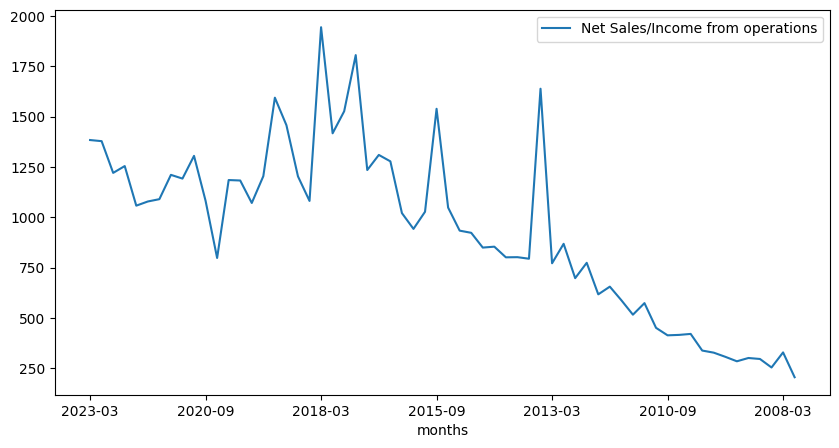

In [8]:
df_is.plot(x = 'months', y ="Net Sales/Income from operations",
        kind="line", figsize=(10, 5))

In [9]:
df_is.head(8)

index   months  Net Sales/Income from operations   
1      2023-03                           1383.82  \
2      2022-12                           1378.24   
3      2022-09                           1220.58   
4      2022-06                           1254.51   
5      2022-03                           1057.78   
6      2021-12                           1078.51   
7      2021-09                           1090.02   
8      2021-06                           1210.82   

index  Total Income From Operations  Employees Cost  Depreciation   
1                           1383.82           86.93        152.50  \
2                           1378.24           70.64        152.10   
3                           1220.58           59.75        154.74   
4                           1254.51           77.38        153.64   
5                           1057.78           57.19        149.30   
6                           1078.51           58.44        153.68   
7                           1090.02           64.88        155.65   
8                           1210.82           60.01        156.16   

index  Other Expenses  P/L Before Other Inc. , Int., Excpt. Items & Tax   
1              304.13                                            840.26  \
2              909.83                                            245.67   
3             1339.39                                           -333.30   
4             1564.59                                           -541.10   
5              880.57                                            -29.28   
6              319.40                                            546.99   
7              291.84                                            577.65   
8              686.20                                            308.45   

index  Other Income  P/L Before Int., Excpt. Items & Tax  Interest   
1           1458.58                              2298.84    744.37  \
2            428.06                               673.73    650.46   
3            514.67                               181.37    632.22   
4            597.48                                56.38    653.34   
5            566.38                               537.10    670.58   
6            777.47                              1324.46    659.80   
7            656.29                              1233.94    630.90   
8            519.18                               827.63    533.36   

index  P/L Before Exceptional Items & Tax  P/L Before Tax   
1                                 1554.47           -3.69  \
2                                   23.27           23.27   
3                                 -450.85         -450.85   
4                                 -596.96         -596.96   
5                                 -133.48         -624.71   
6                                  664.66          664.66   
7                                  603.04          482.44   
8                                  294.27          294.27   

index  P/L After Tax from Ordinary Activities   
1                                      191.85  \
2                                       11.40   
3                                     -298.18   
4                                     -384.50   
5                                     -602.49   
6                                      483.37   
7                                      328.74   
8                                      188.40   

index  Net Profit/(Loss) For the Period  Equity Share Capital  
1                                191.85                432.03  
2                                 11.40                432.03  
3                               -298.18                422.47  
4                               -384.50                422.47  
5                               -602.49                422.47  
6                                483.37                408.35  
7                                328.74                408.35  
8                                188.40                408.35

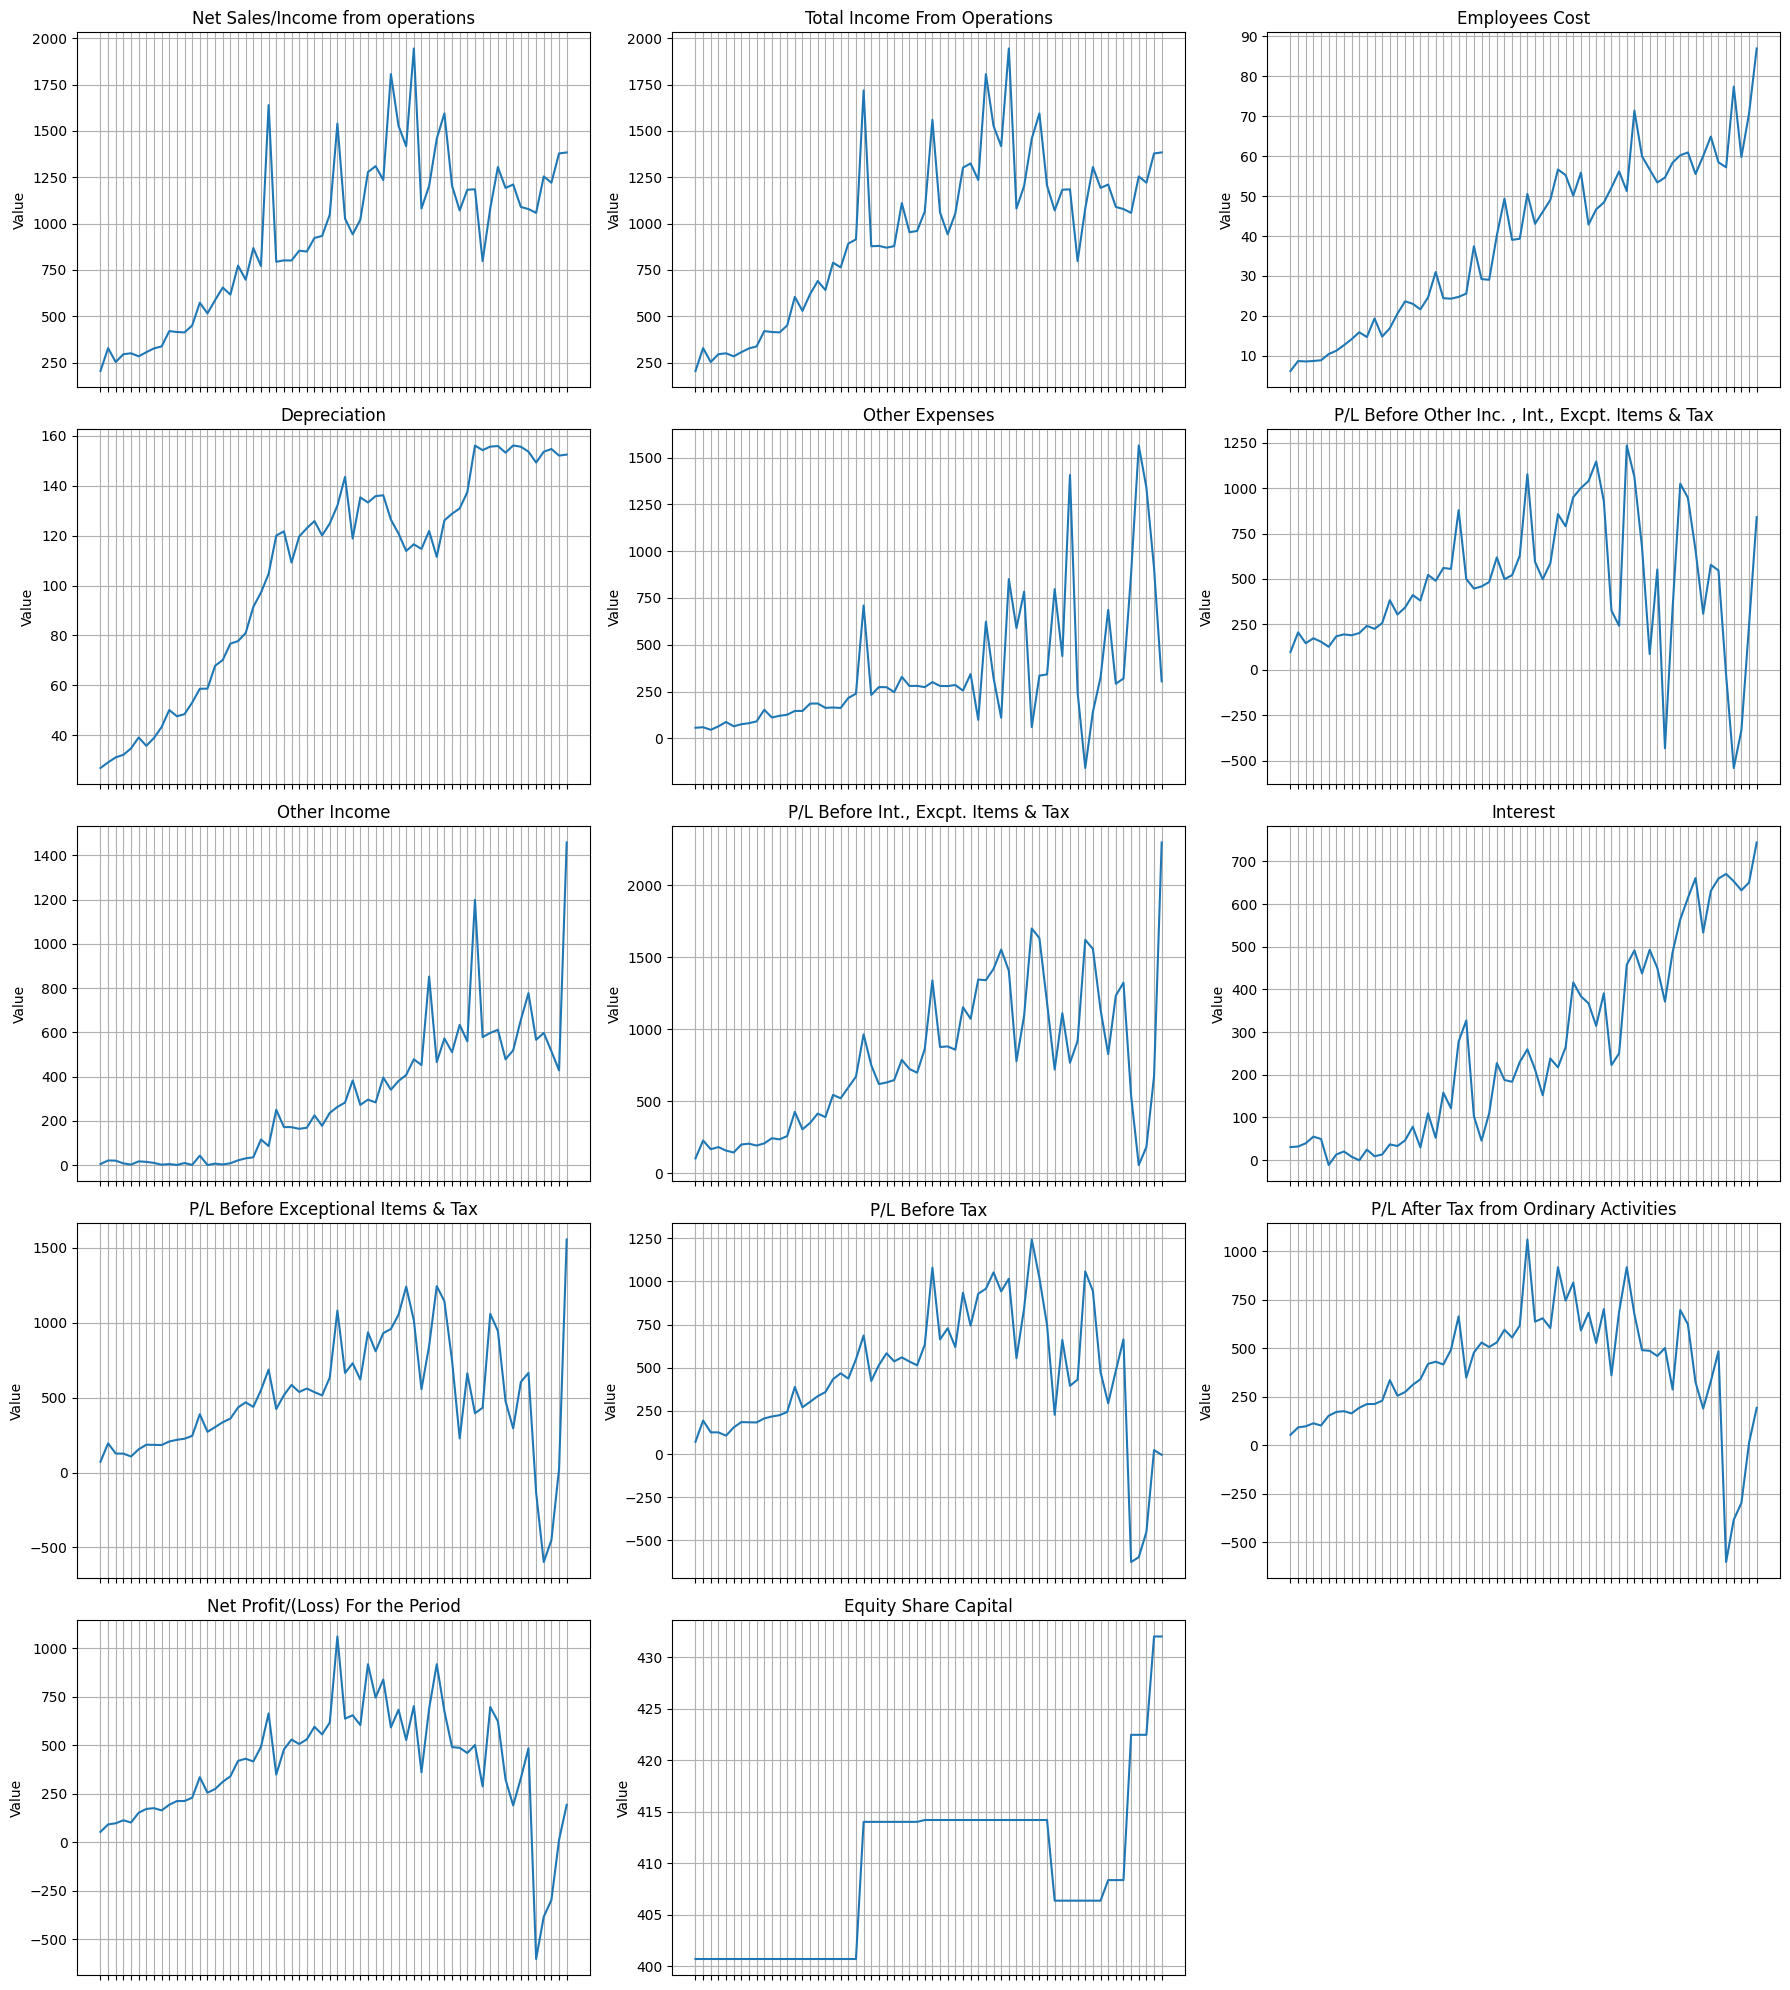

In [10]:
import matplotlib.pyplot as plt

def plot_columns_in_grid(df):
    # Exclude the first column
    df = df.iloc[:, 1:]

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Calculate the figure size based on the number of rows and columns
    figsize = (num_cols * 6, num_rows * 4)  # Adjust the multipliers to make the graphs bigger

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns):
        ax = axes[i]  # Select the current axis

        # Reverse the x-axis values and index
        x_values = df.index[::-1]
        y_values = df[col][::-1]

        ax.plot(x_values, y_values)
        ax.set_title(col)
        ax.set_ylabel('Value')
        ax.grid(True)

        # Tilt the x-axis tick labels
        ax.tick_params(axis='x', rotation=45)

        # Remove x-axis labels
        ax.set_xticklabels([])

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()

plot_columns_in_grid(df_is)

# the x-axis values range from 2004 to 2022 with 3 months gap each. I removed the indexes because it was too crowded

In [11]:
df_1 = df_is.set_index(['months'])
df_1 = df_1['Total Income From Operations']
df_1 = pd.DataFrame(df_1)
df_1.columns = ['Total Income From Operations']


In [12]:
'''import pandas as pd
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt

df_1.index = pd.to_datetime(df_1.index)  # Convert the index to datetime if not already done

y = df_1['Total Income From Operations']

order = (9, 1, 2)  # Specify the order for the SARIMAX model
seasonal_order = (8, 2, 12, 13)  # Specify the seasonal order and order for the SARIMAX model

SARIMAXmodel = SARIMAX(y, order=order, seasonal_order=seasonal_order)
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(11)
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

predicted_dates = pd.date_range(start='2022-02-01', periods=11, freq='AS-MAR')

y_pred_df.index = predicted_dates
y_pred_out = y_pred_df["Predictions"]

sns.set()
plt.title("Total Income from Operations")
plt.ylabel('Money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_1, color="blue")
plt.plot(y_pred_out, color='red', label='Predictions')
plt.legend()
plt.show()'''



'import pandas as pd\nfrom datetime import datetime\nfrom dateutil.rrule import rrule, YEARLY\nfrom dateutil import tz\nfrom statsmodels.tsa.statespace.sarimax import SARIMAX\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ndf_1.index = pd.to_datetime(df_1.index)  # Convert the index to datetime if not already done\n\ny = df_1[\'Total Income From Operations\']\n\norder = (9, 1, 2)  # Specify the order for the SARIMAX model\nseasonal_order = (8, 2, 12, 13)  # Specify the seasonal order and order for the SARIMAX model\n\nSARIMAXmodel = SARIMAX(y, order=order, seasonal_order=seasonal_order)\nSARIMAXmodel = SARIMAXmodel.fit()\n\ny_pred = SARIMAXmodel.get_forecast(11)\ny_pred_df = y_pred.conf_int(alpha=0.05)\ny_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])\n\npredicted_dates = pd.date_range(start=\'2022-02-01\', periods=11, freq=\'AS-MAR\')\n\ny_pred_df.index = predicted_dates\ny_pred_out = y_pred_df["Predictions"]\n\nsns.set()\np

In [13]:
corr_matrix = df_is.iloc[:, 1:].corr()
corr_matrix = corr_matrix.replace(np.nan,0)
def sparsing(x):
    if x < -0.7:
        return -1
    elif x > 0.7:
        return 1
    else:
        return 0


for index, rows in corr_matrix.iterrows():
    for i in rows:
        corr_matrix.replace(i,sparsing(i),inplace=True)
        
corr_matrix = corr_matrix[~(corr_matrix == 0.0).all(axis=1)]
corr_matrix = corr_matrix.loc[:, (corr_matrix != 0).any(axis=0)]
#corr_matrix

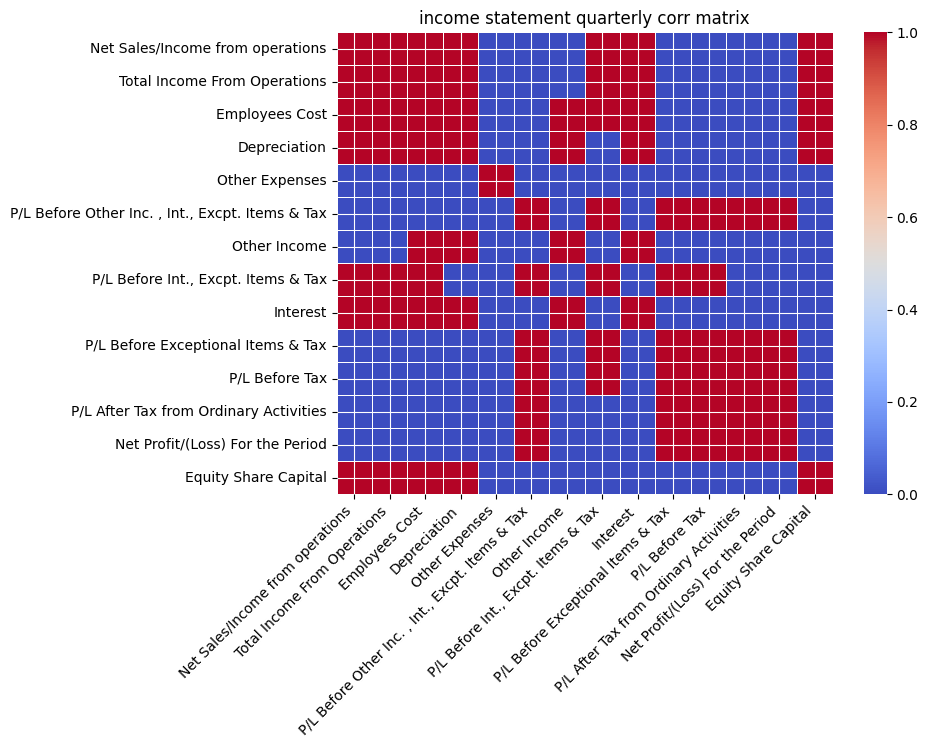

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, cbar=True)

# Add gaps between cells
ax.set_xticks(np.arange(0.5, len(corr_matrix.columns), 1))
ax.set_yticks(np.arange(0.5, len(corr_matrix.index), 1))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)

# Add grid lines between the cells
ax.grid(True, color='white')

# Add title and labels
ax.set_title('income statement quarterly corr matrix')
ax.set_xlabel(None)
ax.set_ylabel(None)
# Show the plot
plt.show()



In [15]:
#corr_matrix.to_csv("..\data\income_stat_corr.csv")

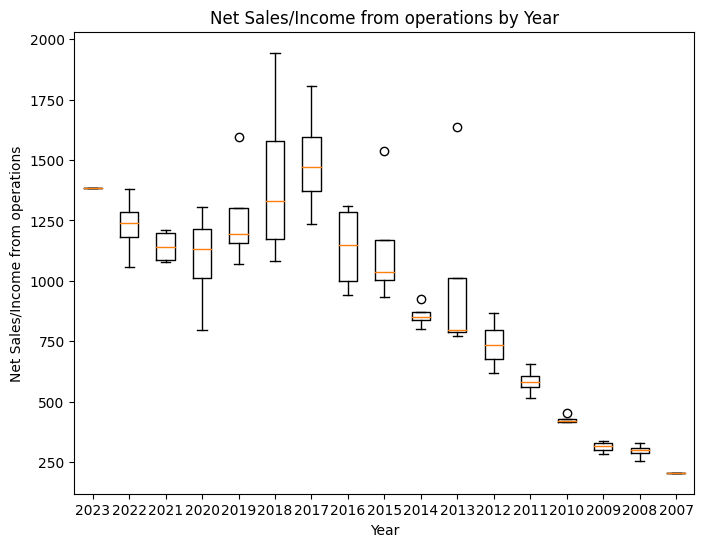

In [16]:
# Box plot of 'Net Sales/Income from operations' by year
df_is['Year'] = df_is['months'].str[:4]  # Extract year from the 'months' column
plt.figure(figsize=(8, 6))
plt.boxplot([df_is[df_is['Year'] == year]['Net Sales/Income from operations'] for year in df_is['Year'].unique()])
plt.xticks(ticks=np.arange(1, len(df_is['Year'].unique()) + 1), labels=df_is['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Net Sales/Income from operations')
plt.title('Net Sales/Income from operations by Year')
plt.show()


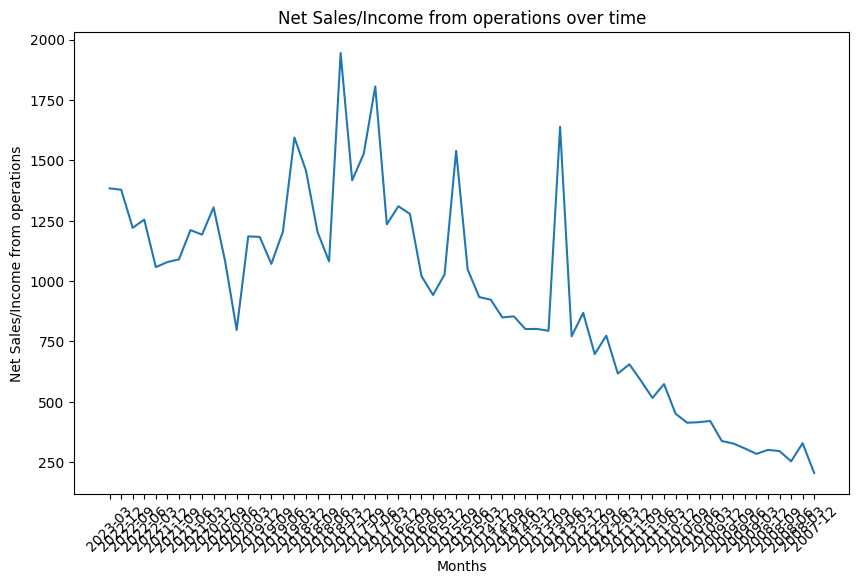

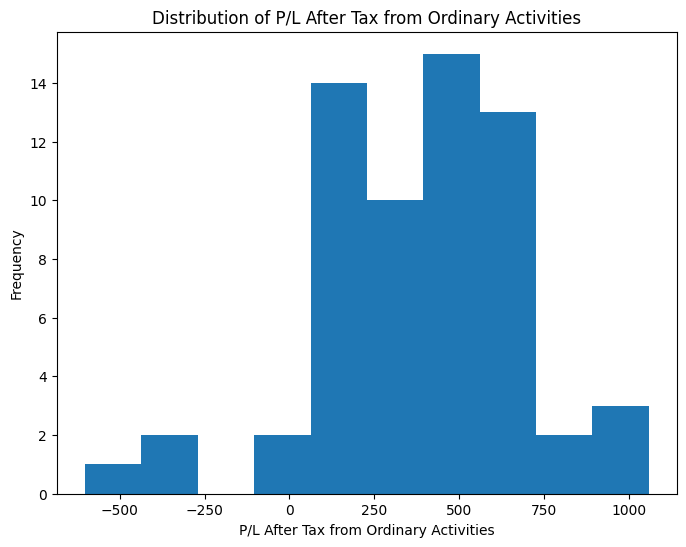

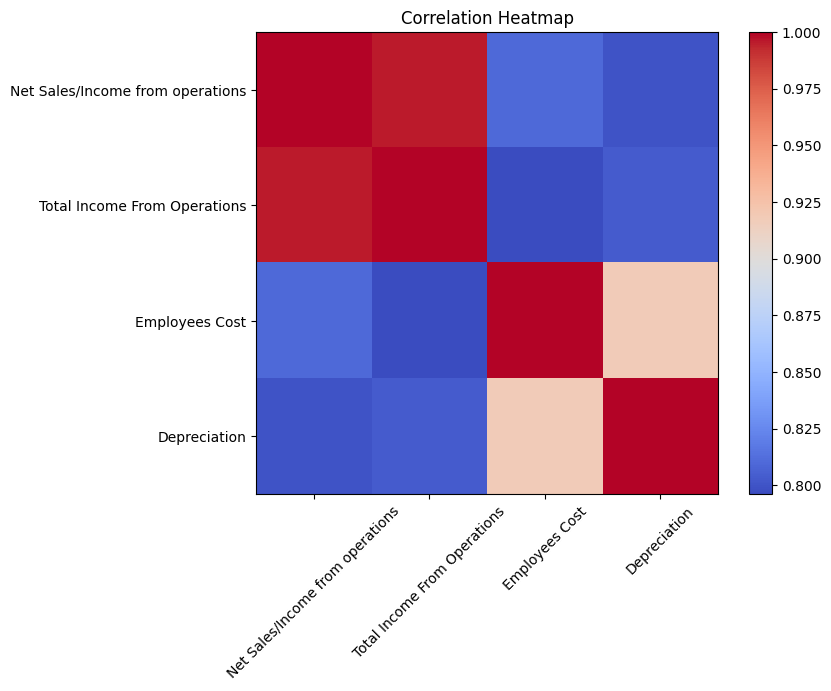

In [17]:
# Line plot of 'Net Sales/Income from operations' over time
plt.figure(figsize=(10, 6))
plt.plot(df_is['months'], df_is['Net Sales/Income from operations'])
plt.xlabel('Months')
plt.ylabel('Net Sales/Income from operations')
plt.title('Net Sales/Income from operations over time')
plt.xticks(rotation=45)
plt.show()

# Histogram of 'P/L After Tax from Ordinary Activities'
plt.figure(figsize=(8, 6))
plt.hist(df_is['P/L After Tax from Ordinary Activities'], bins=10)
plt.xlabel('P/L After Tax from Ordinary Activities')
plt.ylabel('Frequency')
plt.title('Distribution of P/L After Tax from Ordinary Activities')
plt.show()

# Correlation heatmap of selected columns
selected_columns = ['Net Sales/Income from operations', 'Total Income From Operations', 'Employees Cost', 'Depreciation']
corr_matrix = df_is[selected_columns].corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45)
plt.yticks(range(len(selected_columns)), selected_columns)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
df_is = df_is.iloc[:, :-1]

MLPRegressor - Best sofar

In [20]:
#df_is = df_is.drop("P/L After Tax from Ordinary Activities",axis=1)

In [21]:
# 80-20 split MLPregresssor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}

def mlp_regressor_preds(df, column_name):
    X = df.drop(column_name, axis=1)
    y = df[column_name]

    test_size = int(len(df) * 0.3)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(35, 70, 70, 40), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

    return rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'months' column

for column_name in columns_to_predict:
    rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse

error_dict


{'Total Income From Operations': 31.993,
 'Employees Cost': 105.22,
 'Depreciation': 83.46,
 'Other Expenses': 217.06,
 'P/L Before Other Inc. , Int., Excpt. Items & Tax': 290.356,
 'Other Income': 112.269,
 'P/L Before Int., Excpt. Items & Tax': 159.501,
 'Interest': 215.689,
 'P/L Before Exceptional Items & Tax': 289.394,
 'P/L Before Tax': 346.946,
 'P/L After Tax from Ordinary Activities': 271.714,
 'Net Profit/(Loss) For the Period': 271.714,
 'Equity Share Capital': 498.781}

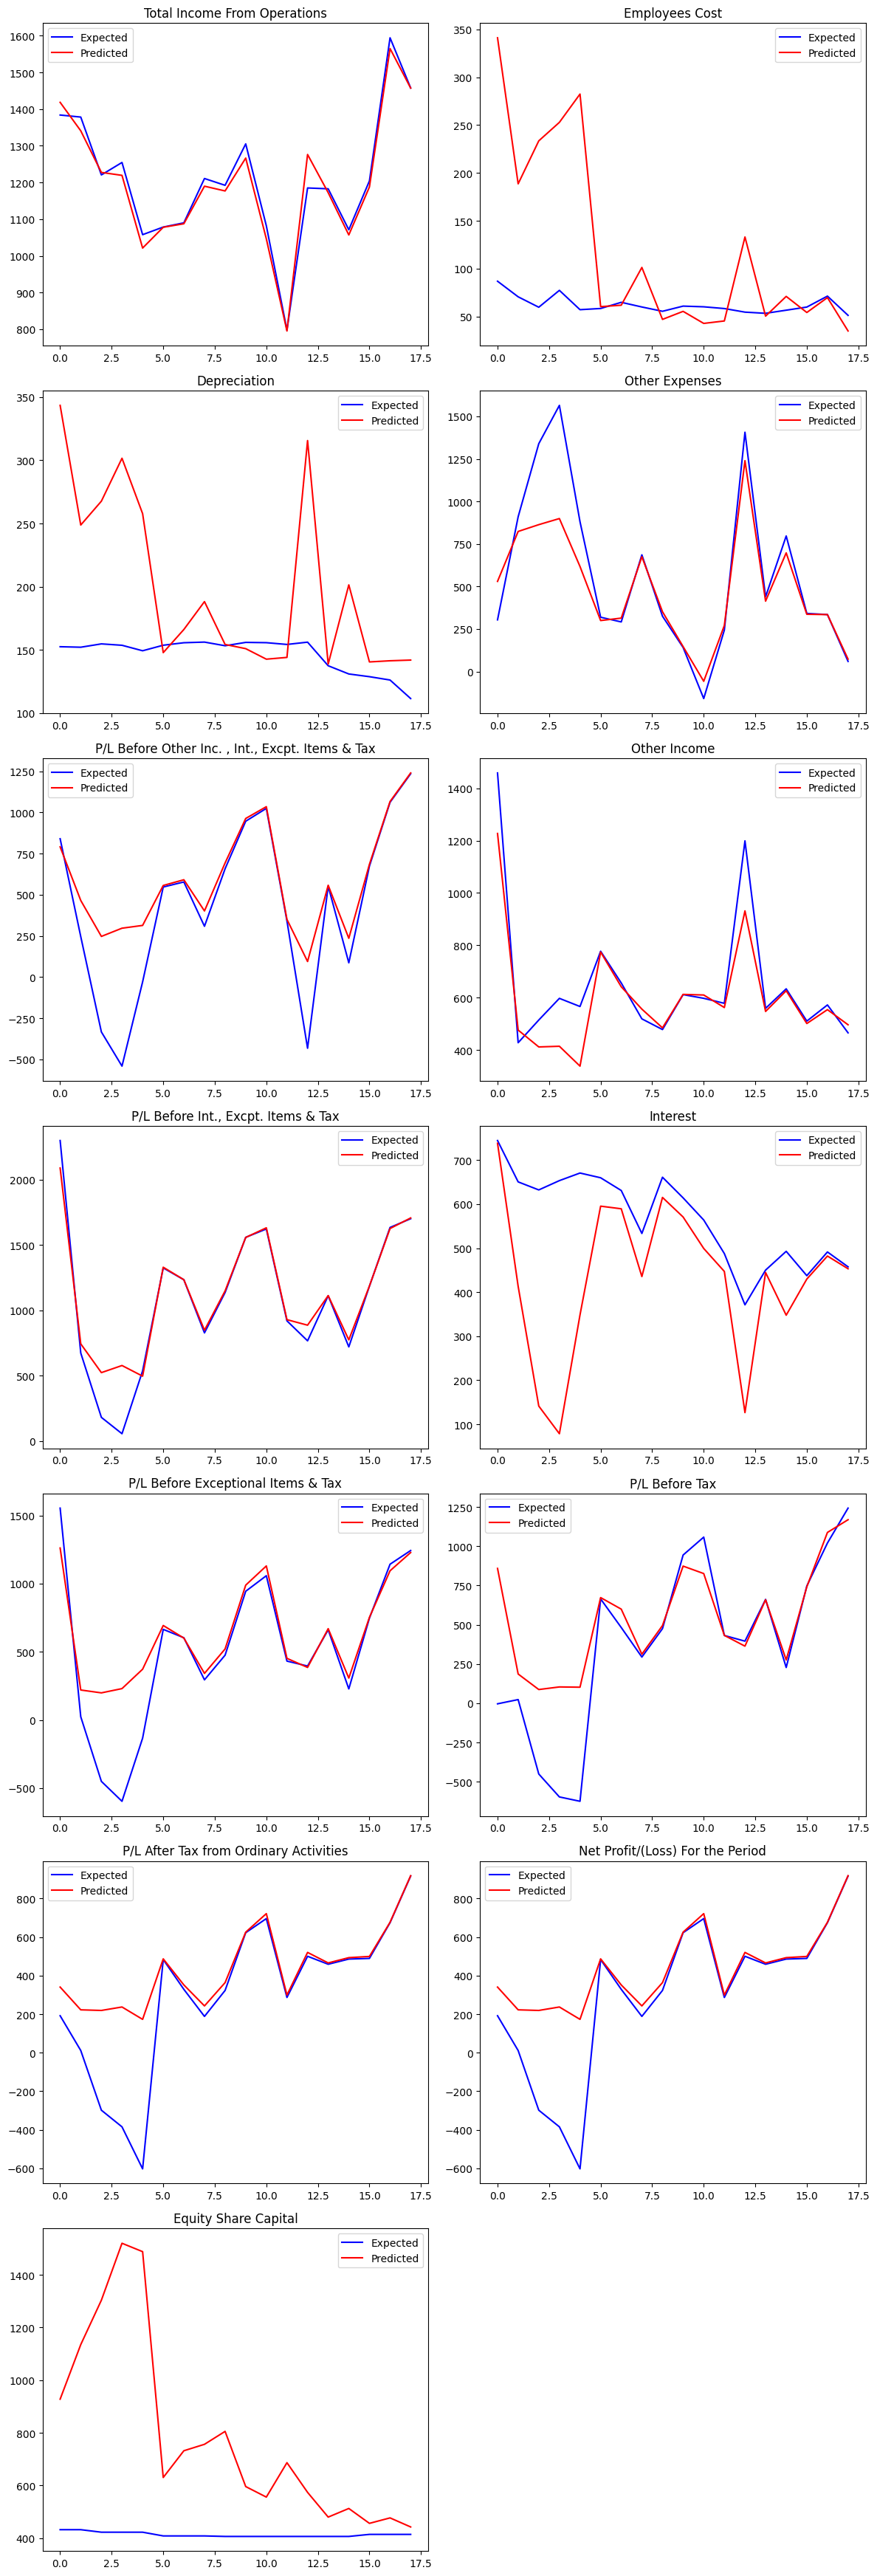

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}

def mlp_regressor_preds(df, column_name):
    test_size = int(len(df) * 0.3)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(35, 70, 70, 40), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'months' column

num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows for a grid layout

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

# Remove any unused subplots
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


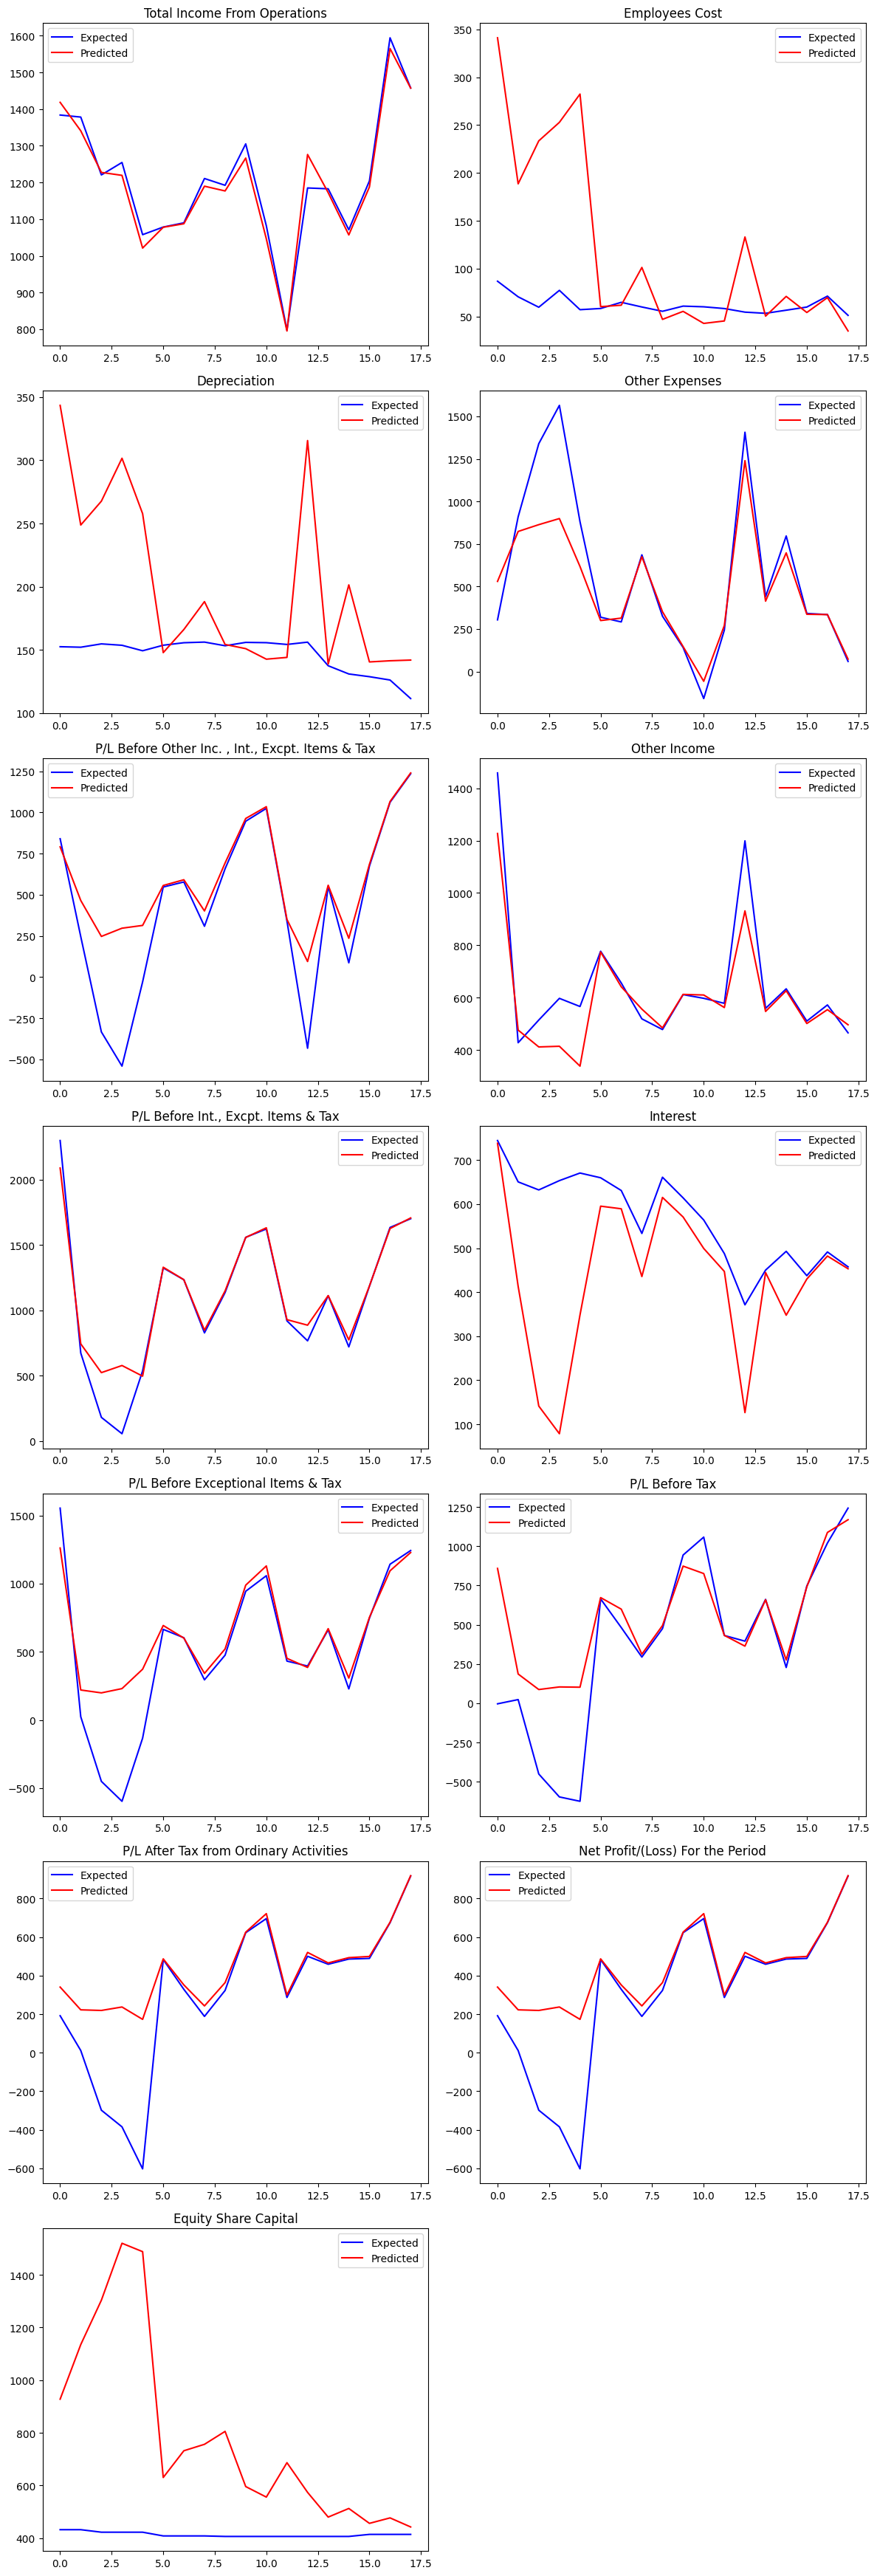

RMSE for Total Income From Operations: 31.9929
RMSE for Employees Cost: 105.2204
RMSE for Depreciation: 83.4603
RMSE for Other Expenses: 217.0602
RMSE for P/L Before Other Inc. , Int., Excpt. Items & Tax: 290.3561
RMSE for Other Income: 112.2689
RMSE for P/L Before Int., Excpt. Items & Tax: 159.5008
RMSE for Interest: 215.6888
RMSE for P/L Before Exceptional Items & Tax: 289.3944
RMSE for P/L Before Tax: 346.9458
RMSE for P/L After Tax from Ordinary Activities: 271.7139
RMSE for Net Profit/(Loss) For the Period: 271.7139
RMSE for Equity Share Capital: 498.7811


In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}  # New dictionary to store RMSE values

def mlp_regressor_preds(df, column_name):
    test_size = int(len(df) * 0.3)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(35, 70, 70, 40), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'months' column

num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows for a grid layout

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse  # Store RMSE value in the dictionary

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

# Remove any unused subplots
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the RMSE values
for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse,4)}")


SARIMAX

In [24]:
#till 2018 - train
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_1 = df_is.set_index(['months'])
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict  = {}
def sarimax_preds(df, column_name):
    df = pd.DataFrame(df)
    df.columns = [column_name]

    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    # Split the data until 2018-03 for training
    train_data = df.loc[:'2019-03']

    y_train = train_data[column_name]
    SARIMAXmodel = SARIMAX(y_train, order=(6, 0, 6), seasonal_order=(5, 4, 10, 15))
    SARIMAXmodel = SARIMAXmodel.fit()

    # Predict from 2018 to 2022
    predicted_dates = pd.date_range(start='2019-03', end='2022-12', freq='3M')
    y_pred = SARIMAXmodel.get_forecast(steps=len(predicted_dates))
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    y_pred_df.index = predicted_dates
    y_pred_out = y_pred_df["Predictions"]

    predictions_df[column_name] = y_pred_out
    predictions_dict[column_name] = y_pred_out

    # Calculate the root mean square error (RMSE)
    actual_values = df.loc['2019-03':'2022-12'][column_name]
    error = actual_values - y_pred_out
    rmse = np.sqrt(np.mean(error**2))
    error_dict[column_name] = rmse


columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column
for column_name in columns_to_predict:
    sarimax_preds(df_1[column_name], column_name)

error_dict

{'Total Income From Operations': nan,
 'Employees Cost': nan,
 'Depreciation': nan,
 'Other Expenses': nan,
 'P/L Before Other Inc. , Int., Excpt. Items & Tax': nan,
 'Other Income': nan,
 'P/L Before Int., Excpt. Items & Tax': nan,
 'Interest': nan,
 'P/L Before Exceptional Items & Tax': nan,
 'P/L Before Tax': nan,
 'P/L After Tax from Ordinary Activities': nan,
 'Net Profit/(Loss) For the Period': nan,
 'Equity Share Capital': nan}

RNN

1/1 [==============================] - 0s 318ms/step


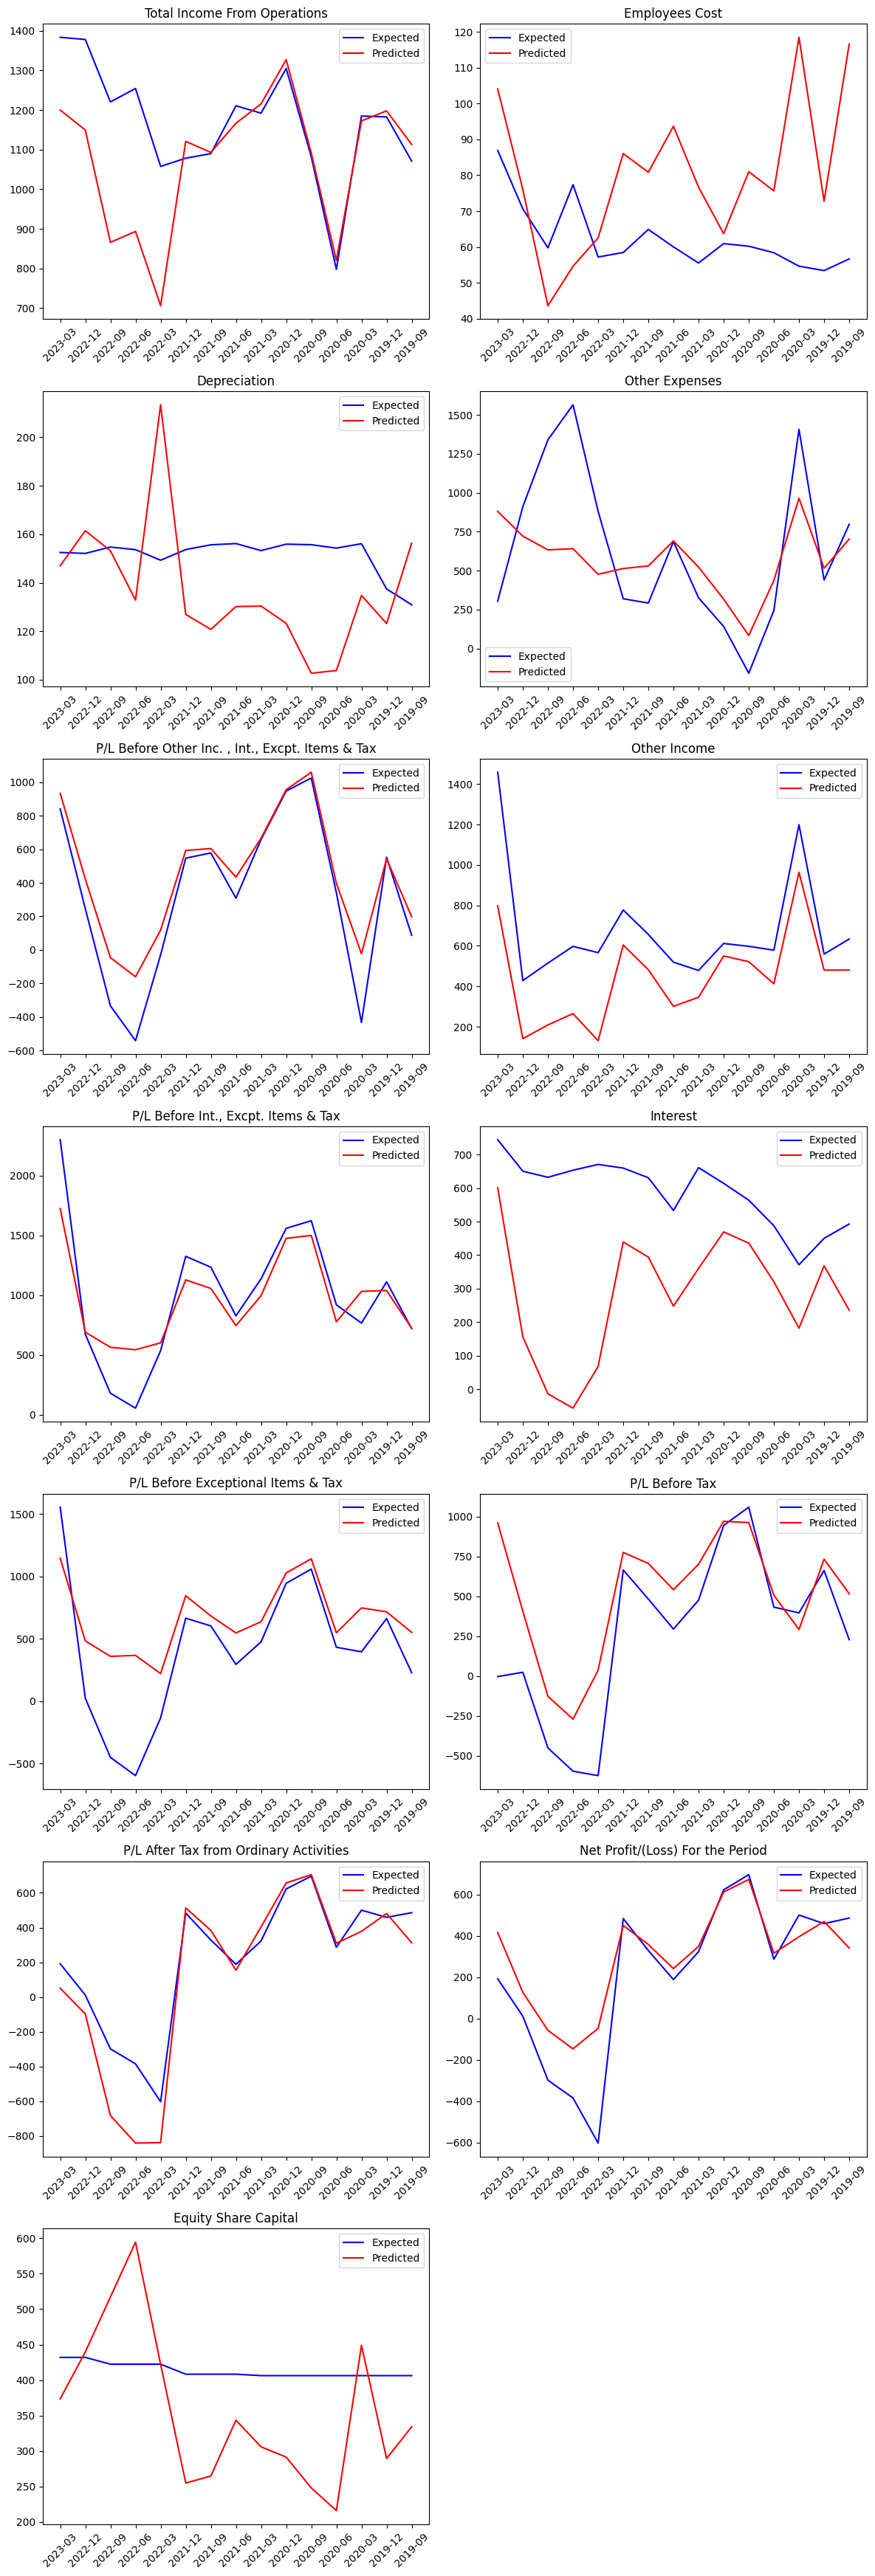

RMSE for Total Income From Operations: 177.6717
RMSE for Employees Cost: 28.8998
RMSE for Depreciation: 32.1607
RMSE for Other Expenses: 396.0395
RMSE for P/L Before Other Inc. , Int., Excpt. Items & Tax: 181.0419
RMSE for Other Income: 278.2519
RMSE for P/L Before Int., Excpt. Items & Tax: 249.6743
RMSE for Interest: 365.0797
RMSE for P/L Before Exceptional Items & Tax: 406.2073
RMSE for P/L Before Tax: 366.2777
RMSE for P/L After Tax from Ordinary Activities: 182.843
RMSE for Net Profit/(Loss) For the Period: 187.0529
RMSE for Equity Share Capital: 114.1418


In [25]:
#double layer
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}

def rnn_preds(df, column_name):
    test_size = int(len(df) * 0.25)
    X_train = df.iloc[test_size:].drop(column_name, axis=1).values
    y_train = df.iloc[test_size:][column_name].values
    X_test = df.iloc[:test_size].drop(column_name, axis=1).values
    y_test = df.iloc[:test_size][column_name].values

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(SimpleRNN(80, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(SimpleRNN(40, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam())

    model.fit(X_train, y_train, epochs=100, batch_size=40, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse


columns_to_predict = df_1.columns[1:]
num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = rnn_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

    # Set x-axis labels with corresponding months
    ax.set_xticks(range(len(y_test)))
    ax.set_xticklabels(df_1.index[:len(y_test)], rotation=45)

if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse, 4)}")

LSTM

1/1 [==============================] - 0s 180ms/step


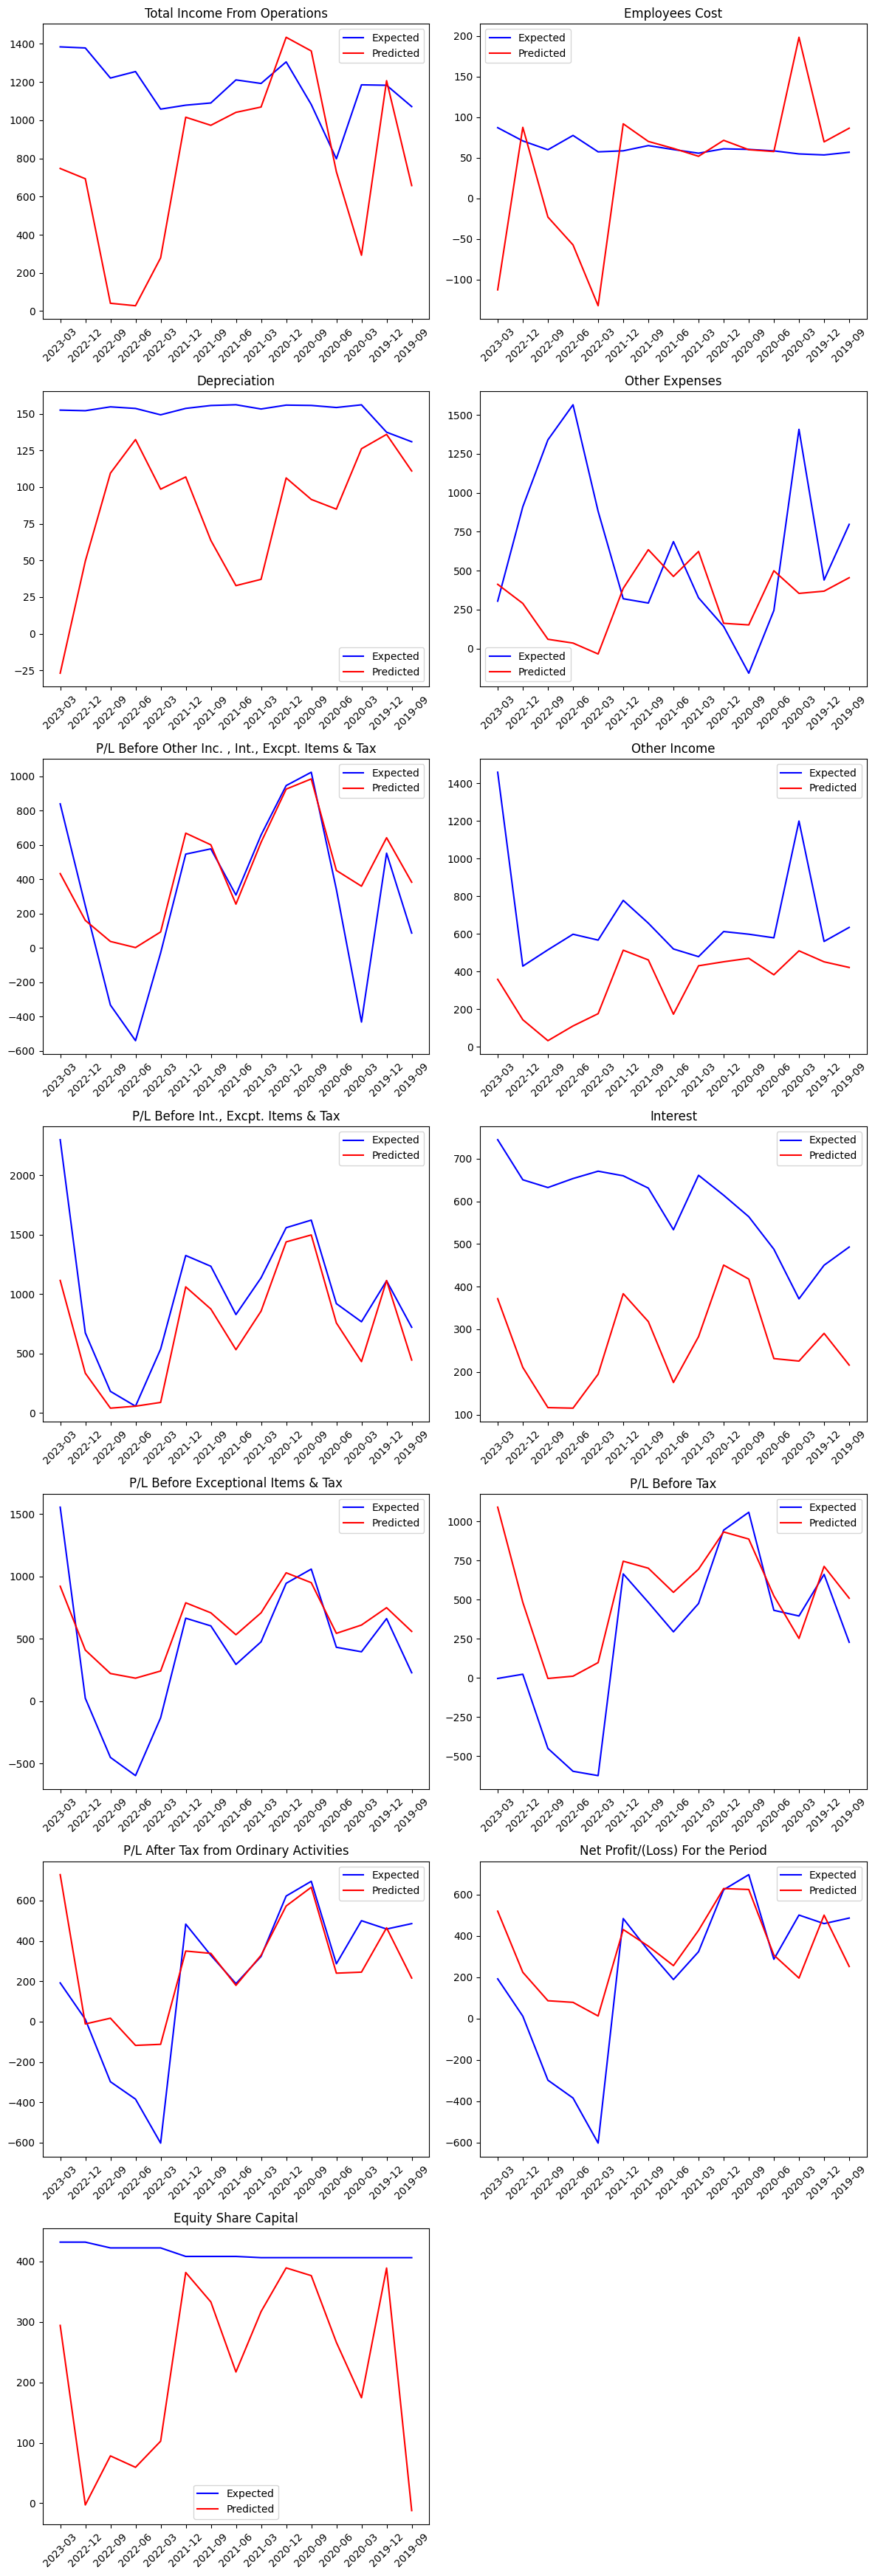

RMSE for Total Income From Operations: 605.8715
RMSE for Employees Cost: 90.9271
RMSE for Depreciation: 81.5579
RMSE for Other Expenses: 676.5526
RMSE for P/L Before Other Inc. , Int., Excpt. Items & Tax: 303.1302
RMSE for Other Income: 429.0492
RMSE for P/L Before Int., Excpt. Items & Tax: 395.6999
RMSE for Interest: 346.1262
RMSE for P/L Before Exceptional Items & Tax: 372.7731
RMSE for P/L Before Tax: 432.5843
RMSE for P/L After Tax from Ordinary Activities: 239.4797
RMSE for Net Profit/(Loss) For the Period: 266.4686
RMSE for Equity Share Capital: 239.656


In [26]:
#single LSTM Layer
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}

def rnn_preds(df, column_name):
    test_size = int(len(df) * 0.25)
    X_train = df.iloc[test_size:].drop(column_name, axis=1).values
    y_train = df.iloc[test_size:][column_name].values
    X_test = df.iloc[:test_size].drop(column_name, axis=1).values
    y_test = df.iloc[:test_size][column_name].values

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(70, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam())

    model.fit(X_train, y_train, epochs=70, batch_size=8, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse


columns_to_predict = df_1.columns[1:]
num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = rnn_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

    # Set x-axis labels with corresponding months
    ax.set_xticks(range(len(y_test)))
    ax.set_xticklabels(df_1.index[:len(y_test)], rotation=45)

if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse, 4)}")


1/1 [==============================] - 0s 282ms/step
Epoch 22: early stopping
1/1 [==============================] - 0s 230ms/step
Epoch 12: early stopping
1/1 [==============================] - 0s 211ms/step
Epoch 47: early stopping
1/1 [==============================] - 0s 285ms/step
Epoch 42: early stopping
1/1 [==============================] - 0s 353ms/step
Epoch 12: early stopping
1/1 [==============================] - 0s 366ms/step
Epoch 18: early stopping
1/1 [==============================] - 0s 446ms/step
Epoch 19: early stopping
1/1 [==============================] - 0s 437ms/step
Epoch 58: early stopping
1/1 [==============================] - 0s 434ms/step
Epoch 13: early stopping
1/1 [==============================] - 0s 348ms/step
Epoch 12: early stopping
1/1 [==============================] - 0s 417ms/step
Epoch 25: early stopping
1/1 [==============================] - 0s 436ms/step
Epoch 16: early stopping
1/1 [==============================] - 0s 336ms/step


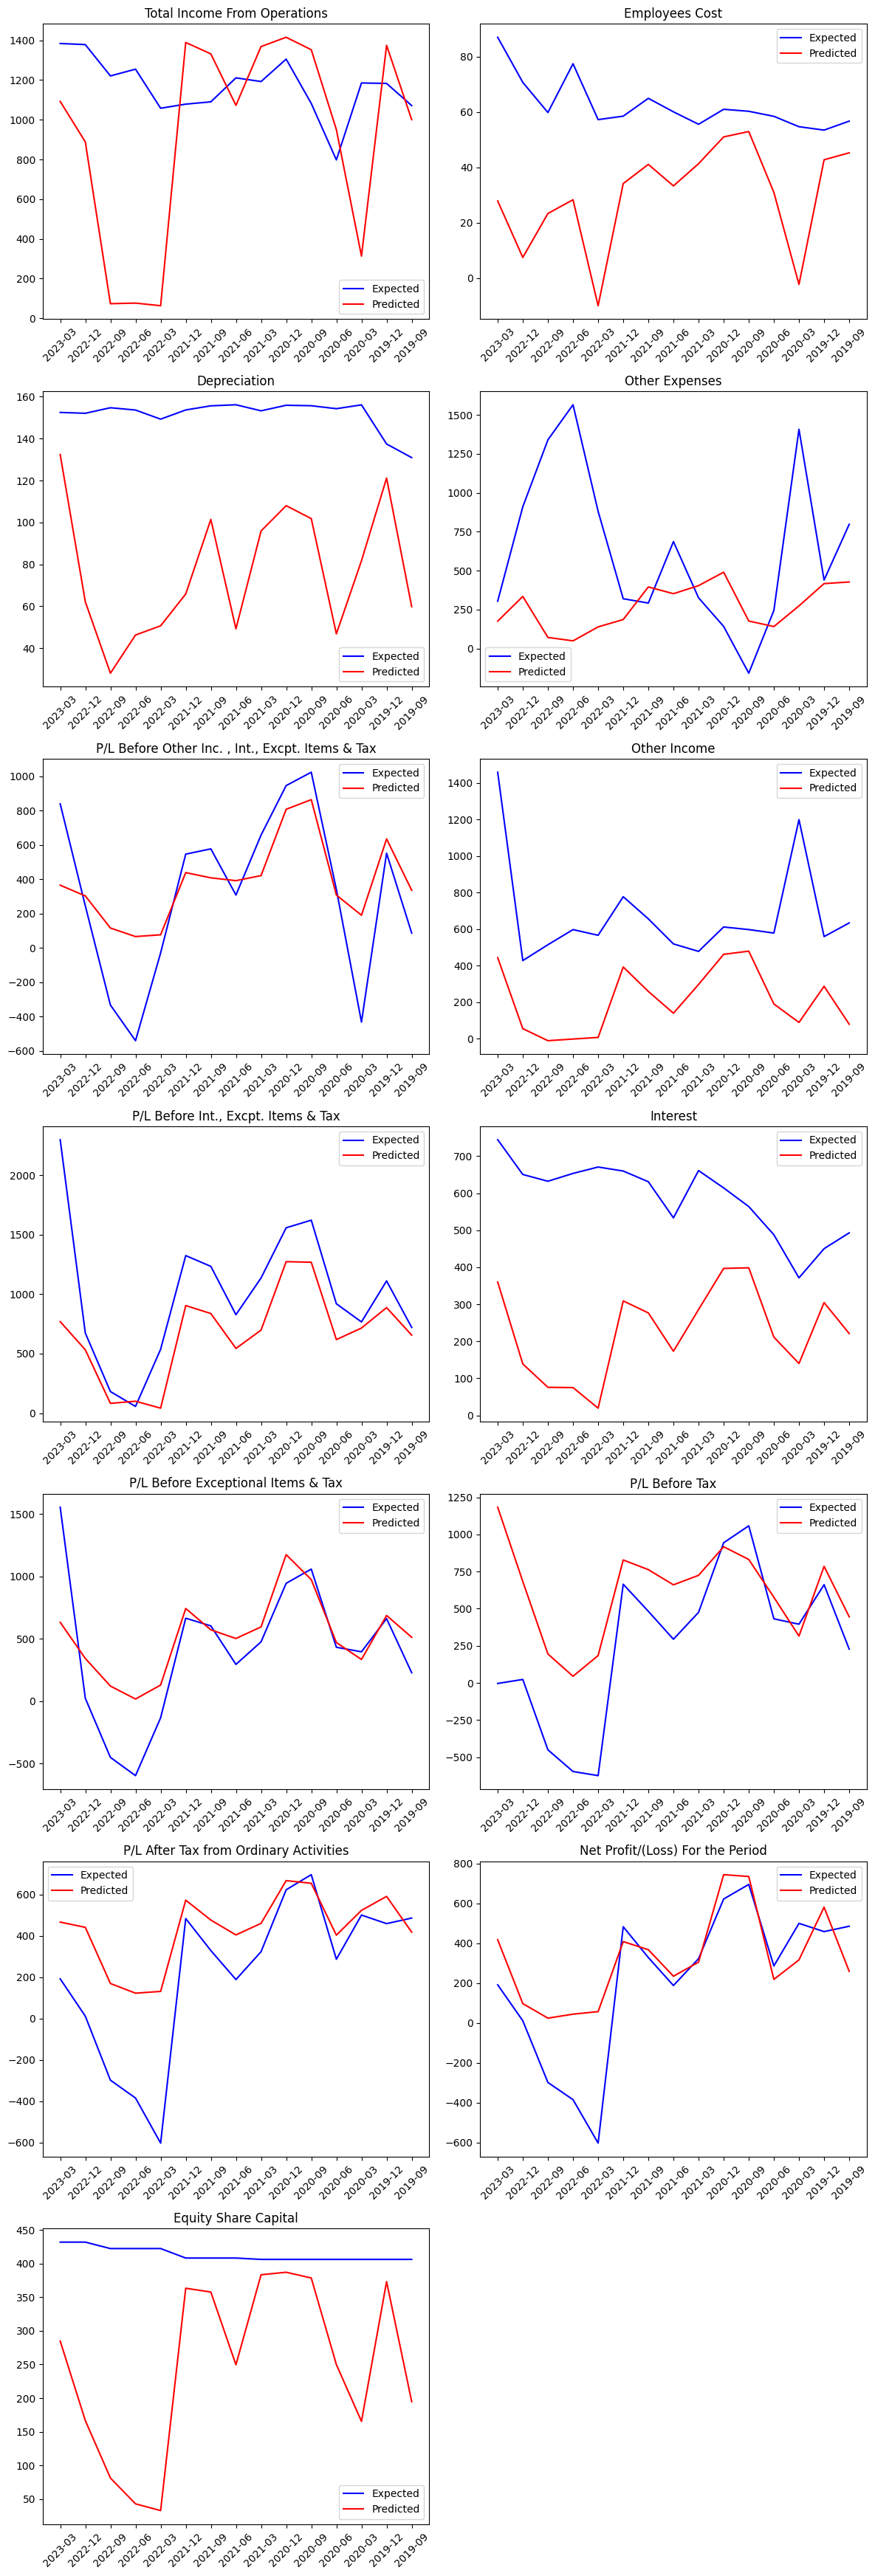

RMSE for Total Income From Operations: 584.879
RMSE for Employees Cost: 38.5032
RMSE for Depreciation: 81.131
RMSE for Other Expenses: 664.0618
RMSE for P/L Before Other Inc. , Int., Excpt. Items & Tax: 307.3069
RMSE for Other Income: 541.3728
RMSE for P/L Before Int., Excpt. Items & Tax: 488.2966
RMSE for Interest: 391.1881
RMSE for P/L Before Exceptional Items & Tax: 359.3428
RMSE for P/L Before Tax: 501.5415
RMSE for P/L After Tax from Ordinary Activities: 306.4223
RMSE for Net Profit/(Loss) For the Period: 246.7075
RMSE for Equity Share Capital: 210.4425


In [27]:
#double LSTM Layer
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}

def rnn_preds(df, column_name):
    test_size = int(len(df) * 0.25)
    X_train = df.iloc[test_size:].drop(column_name, axis=1).values
    y_train = df.iloc[test_size:][column_name].values
    X_test = df.iloc[:test_size].drop(column_name, axis=1).values
    y_test = df.iloc[:test_size][column_name].values

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(80, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam())

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

    model.fit(X_train, y_train, epochs=70, batch_size=8, verbose=0, validation_data=(X_test, y_test) ,callbacks=[early_stopping])

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse


columns_to_predict = df_1.columns[1:]
num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = rnn_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

    # Set x-axis labels with corresponding months
    ax.set_xticks(range(len(y_test)))
    ax.set_xticklabels(df_1.index[:len(y_test)], rotation=45)

if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse, 4)}")


Holt-Winters Exponential Smoothing

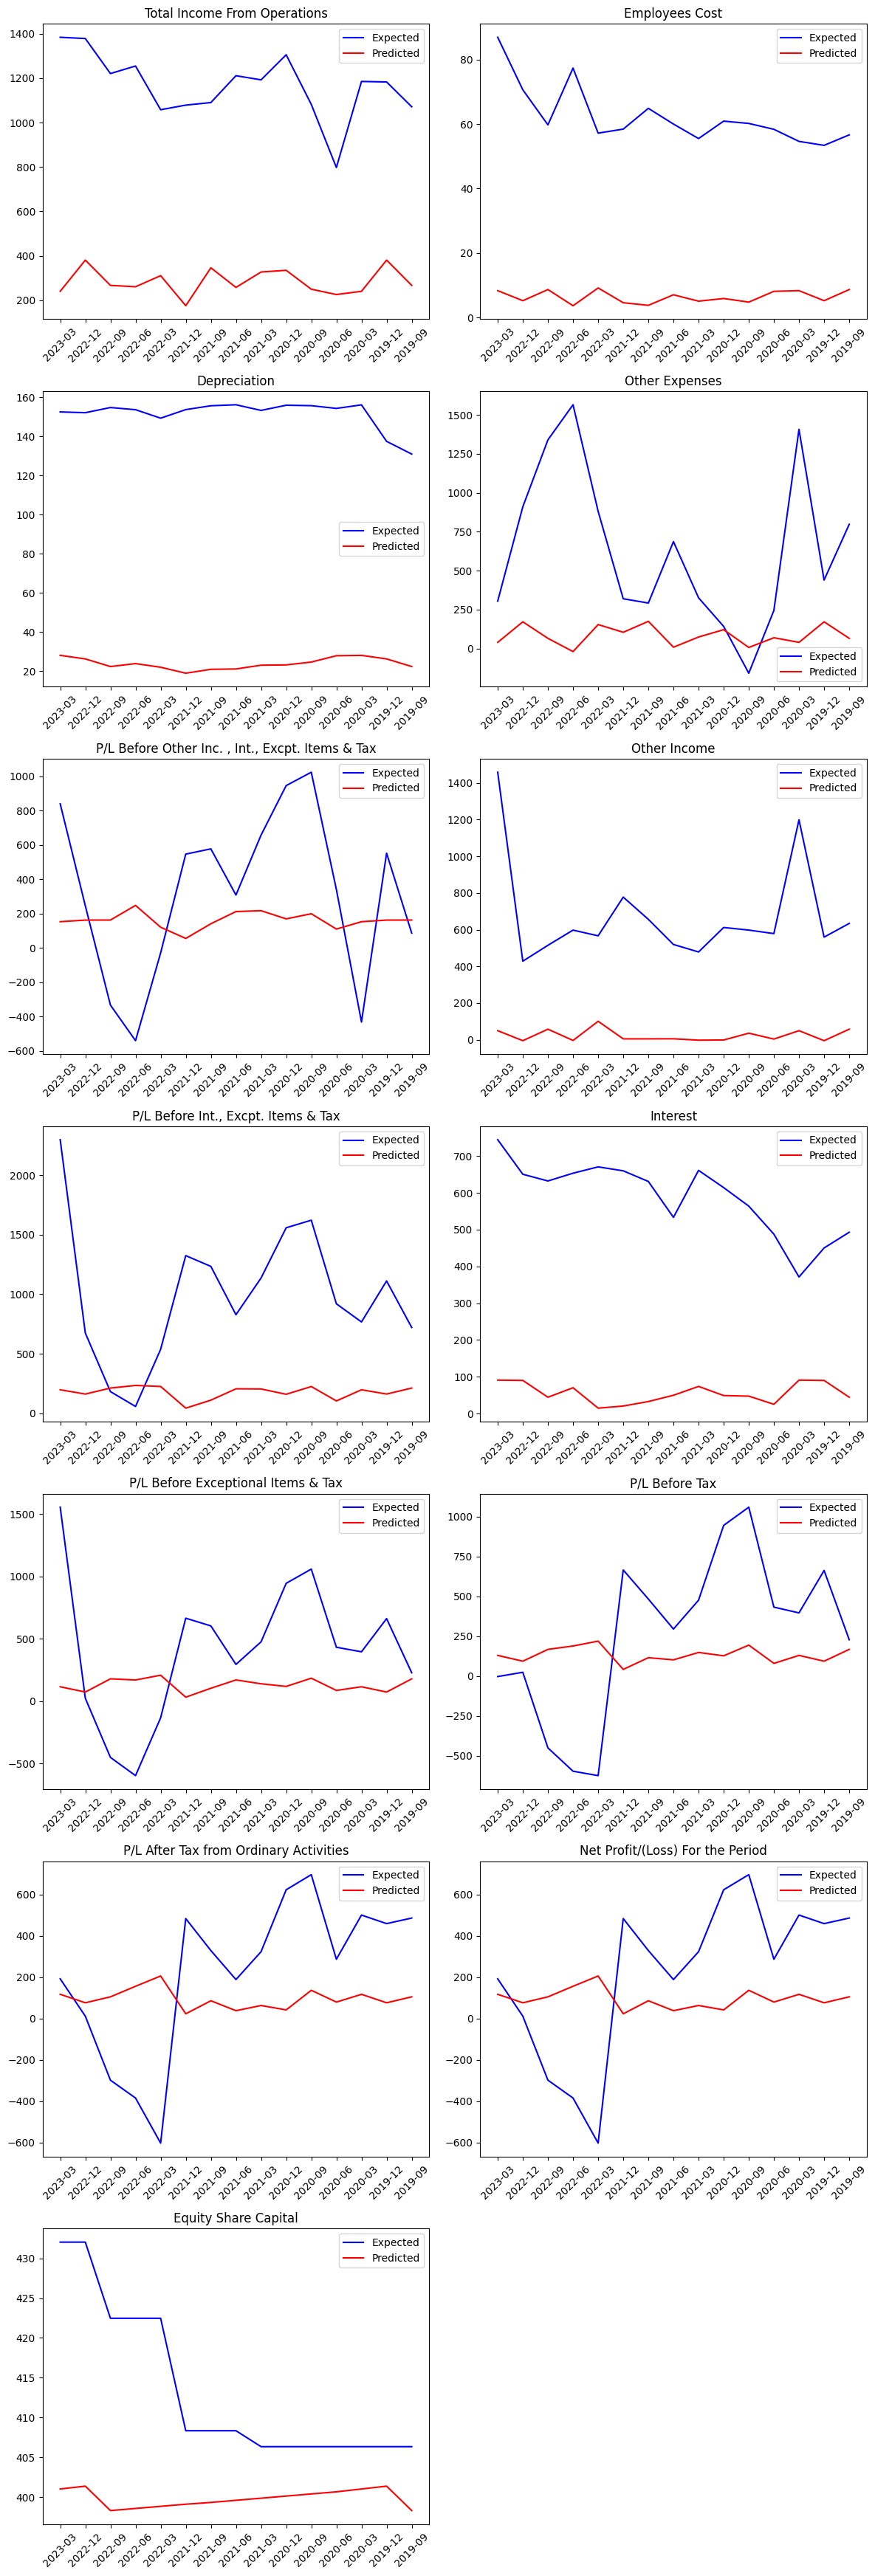

RMSE for Total Income From Operations: 891.5121
RMSE for Employees Cost: 56.6921
RMSE for Depreciation: 127.7881
RMSE for Other Expenses: 748.1147
RMSE for P/L Before Other Inc. , Int., Excpt. Items & Tax: 506.36
RMSE for Other Income: 706.1956
RMSE for P/L Before Int., Excpt. Items & Tax: 1001.5786
RMSE for Interest: 542.1767
RMSE for P/L Before Exceptional Items & Tax: 629.6952
RMSE for P/L Before Tax: 537.8341
RMSE for P/L After Tax from Ordinary Activities: 417.1665
RMSE for Net Profit/(Loss) For the Period: 417.1665
RMSE for Equity Share Capital: 16.568


In [28]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}

def hwes_preds(df, column_name):
    test_size = int(len(df) * 0.25)
    train_data = df.iloc[test_size:][column_name]
    test_data = df.iloc[:test_size][column_name]

    model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    y_pred = model_fit.forecast(len(test_data))
    rmse = np.sqrt(mean_squared_error(test_data, y_pred))

    return test_data, y_pred, rmse

columns_to_predict = df_1.columns[1:]
num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = hwes_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

    # Set x-axis labels with corresponding months
    ax.set_xticks(range(len(y_test)))
    ax.set_xticklabels(df_1.index[:len(y_test)], rotation=45)

if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse, 4)}")


FBProphet with lasso regressor

12:21:05 - cmdstanpy - INFO - Chain [1] start processing
12:21:05 - cmdstanpy - INFO - Chain [1] done processing
12:21:06 - cmdstanpy - INFO - Chain [1] start processing
12:21:06 - cmdstanpy - INFO - Chain [1] done processing
12:21:06 - cmdstanpy - INFO - Chain [1] start processing
12:21:07 - cmdstanpy - INFO - Chain [1] done processing
12:21:07 - cmdstanpy - INFO - Chain [1] start processing
12:21:07 - cmdstanpy - INFO - Chain [1] done processing
12:21:08 - cmdstanpy - INFO - Chain [1] start processing
12:21:08 - cmdstanpy - INFO - Chain [1] done processing
12:21:08 - cmdstanpy - INFO - Chain [1] start processing
12:21:09 - cmdstanpy - INFO - Chain [1] done processing
12:21:09 - cmdstanpy - INFO - Chain [1] start processing
12:21:10 - cmdstanpy - INFO - Chain [1] done processing
12:21:10 - cmdstanpy - INFO - Chain [1] start processing
12:21:10 - cmdstanpy - INFO - Chain [1] done processing
12:21:11 - cmdstanpy - INFO - Chain [1] start processing
12:21:11 - cmdstanpy - INFO - Chain [1]

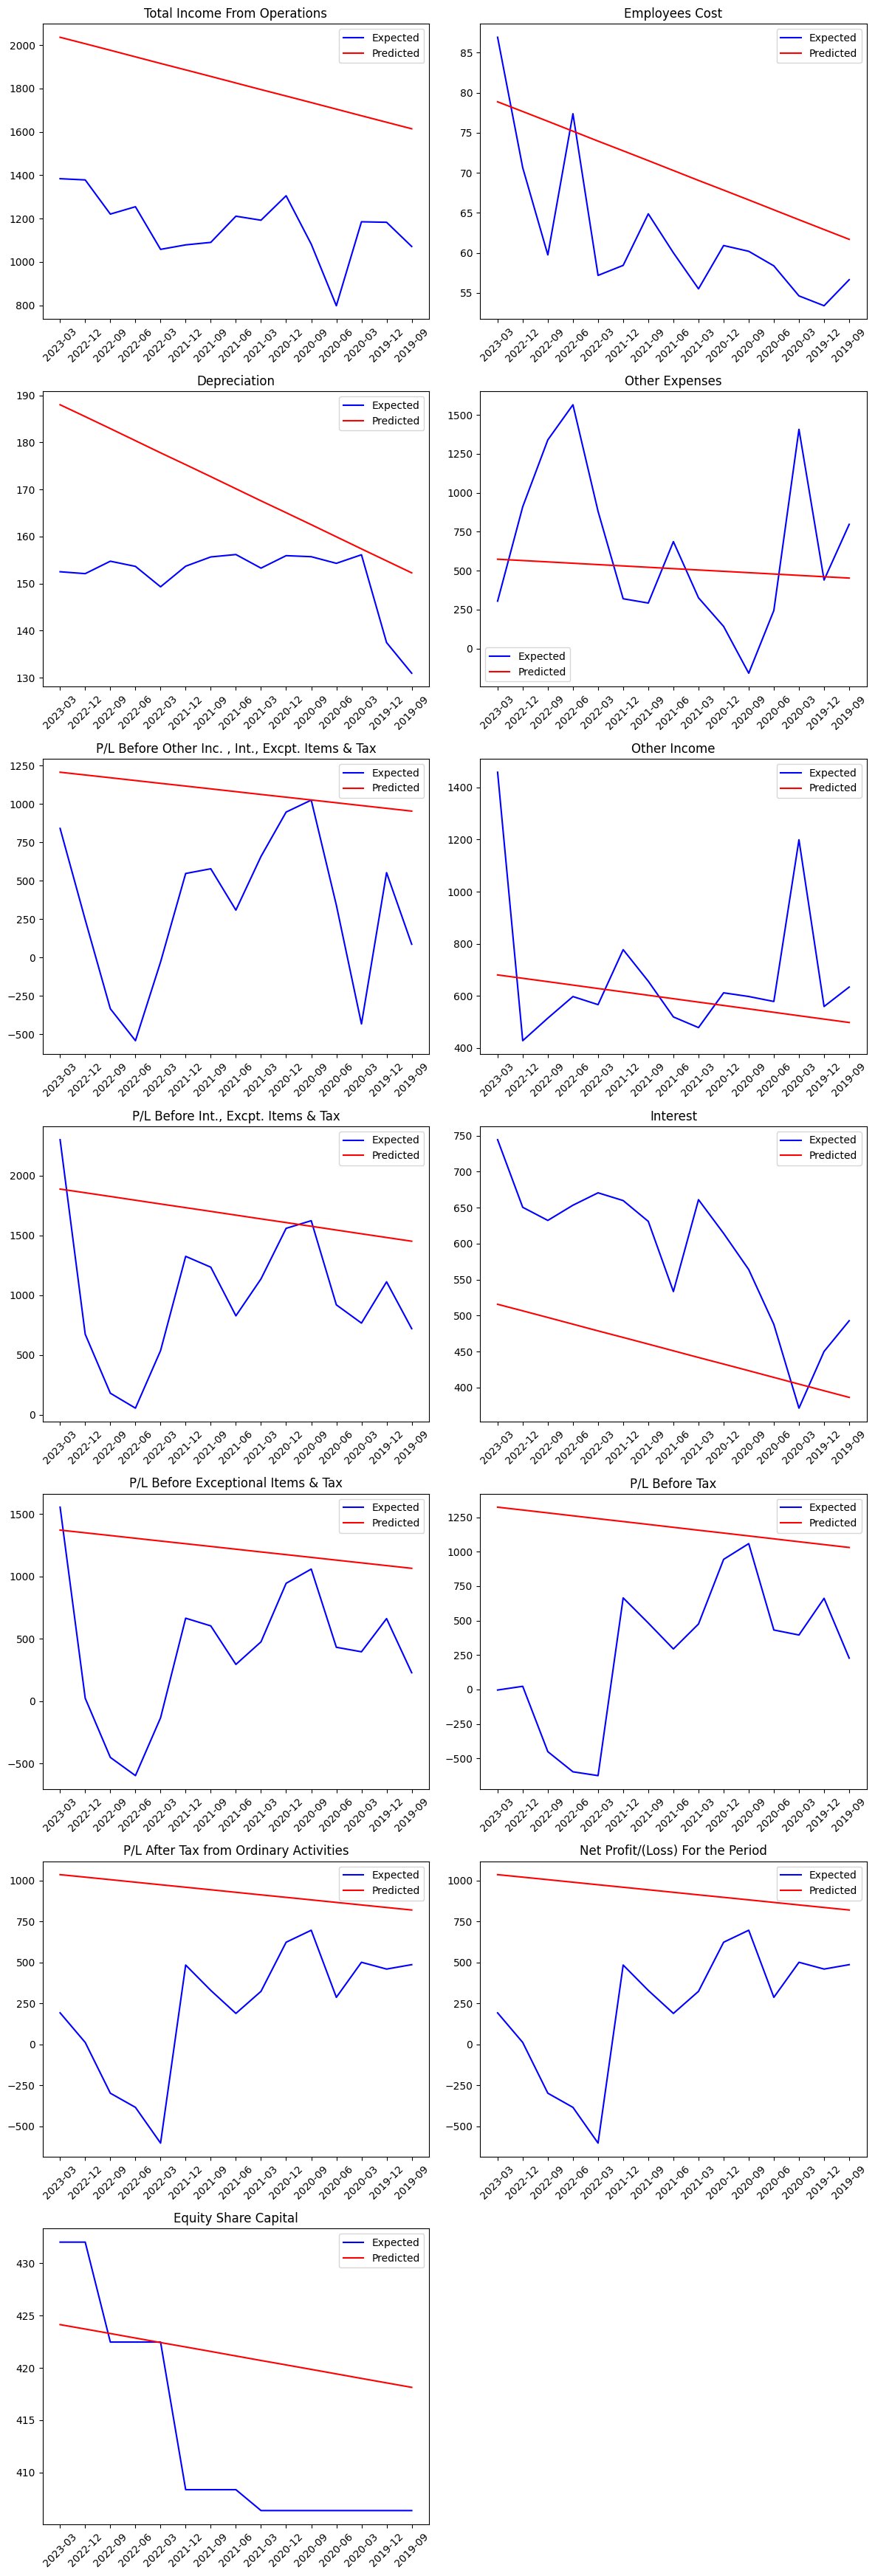

RMSE for Total Income From Operations: 672.9617
RMSE for Employees Cost: 10.2023
RMSE for Depreciation: 21.241
RMSE for Other Expenses: 497.343
RMSE for P/L Before Other Inc. , Int., Excpt. Items & Tax: 903.7326
RMSE for Other Income: 284.6085
RMSE for P/L Before Int., Excpt. Items & Tax: 884.9839
RMSE for Interest: 152.5478
RMSE for P/L Before Exceptional Items & Tax: 988.2901
RMSE for P/L Before Tax: 1068.0261
RMSE for P/L After Tax from Ordinary Activities: 820.7316
RMSE for Net Profit/(Loss) For the Period: 820.7316
RMSE for Equity Share Capital: 11.1311


In [25]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from prophet import Prophet
from sklearn.linear_model import Lasso

warnings.filterwarnings("ignore")

df_1 = df_is.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}

def prophet_lasso_preds(df, column_name):
    test_size = int(len(df) * 0.25)
    df_train = df.iloc[test_size:].reset_index()
    df_train = df_train.rename(columns={'months': 'ds', column_name: 'y'})

    df_test = df.iloc[:test_size].reset_index()
    df_test = df_test.rename(columns={'months': 'ds', column_name: 'y'})

    # Convert 'ds' column to pandas datetime format
    df_train['ds'] = pd.to_datetime(df_train['ds'])
    df_test['ds'] = pd.to_datetime(df_test['ds'])

    model = Prophet()
    model.fit(df_train)

    future = model.make_future_dataframe(periods=len(df_test))
    forecast = model.predict(future)

    X_train = df_train['ds'].apply(lambda x: x.toordinal()).values
    X_test = df_test['ds'].apply(lambda x: x.toordinal()).values
    y_train = df_train['y'].values
    y_test = df_test['y'].values

    lasso = Lasso()
    lasso.fit(X_train.reshape(-1, 1), y_train)
    y_pred = lasso.predict(X_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

columns_to_predict = df_1.columns[1:]
num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = prophet_lasso_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

    # Set x-axis labels with corresponding months
    ax.set_xticks(range(len(y_test)))
    ax.set_xticklabels(df_1.index[:len(y_test)], rotation=45)

if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse, 4)}")
